In [31]:
import numpy as np
import tensorflow as tf

In [32]:
a, b = 3, 2
low=-1; high=1 ; n = 100

trueX = np.random.uniform(low=low,high=high, size=n)
trueY = (a*trueX + b) + np.random.normal(loc=0, scale=.5*max(trueX), size=[len(trueX)])  #stddev = 10%

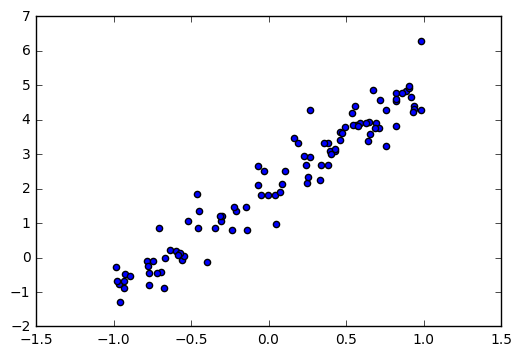

[ 0.46378835  0.94115588  0.2649943  -0.30729714  0.75725497]
[ 3.65248511  4.41191917  2.92661821  1.05647715  4.29096472]


In [33]:
import matplotlib.pyplot as plt
plt.scatter(trueX, trueY)
plt.show()
plt.close()

print trueX[0:5]
print trueY[0:5]

In [34]:
a_guess = 10. ; b_guess = 10.

a = tf.Variable(a_guess)
b = tf.Variable(b_guess)
y = a*trueX + b

In [35]:
loss = tf.reduce_mean(tf.square(y - trueY))   
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [36]:
init = tf.initialize_all_variables()
session = tf.Session()
session.run(init)

In [37]:
convergenceTolerance = 0.01
previous_a = np.inf
previous_b = np.inf

steps = {}
steps['a'] = []
steps['b'] = []

for k in range(100000):
    _, _a , _b = session.run([train, a, b]) 
    steps['a'].append(_a)
    steps['b'].append(_b)
    if (np.abs(previous_a - _a) or np.abs(previous_b - _b) ) <= convergenceTolerance :
        print "Finished by Convergence Criterion"
        break
    previous_a = _a, 
    previous_b = _b, 
    
session.close()    

Finished by Convergence Criterion


Populating the interactive namespace from numpy and matplotlib


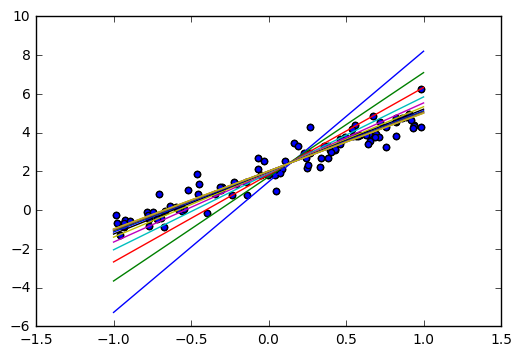

In [38]:
%pylab inline
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots()
#ax.set_xlim((low, high))
#ax.set_ylim((min(trueY), max(trueY)))

x = np.linspace(low, high,n)

def init():
    line = plt.scatter(trueX, trueY)
    return line
    
def animate(i):
    line = plt.plot(x, steps['a'][i]*x + steps['b'][i])
    return line

lines_ani = animation.FuncAnimation(fig=fig, func=animate, init_func=init, frames=len(steps['a']), repeat=True, interval=500, blit=False)
HTML(lines_ani.to_html5_video())